#Кейс "Моделирование"

##Подключение библиотек

In [22]:
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom


##Синий уровень

In [24]:
#вероятность того, что настоящая конверсия будет 18%
n = 200
p = 0.18
print(1 - sps.binom(n, p).cdf(42))
print(sps.binom(n, p).cdf(40))

0.11718251291689608
0.7980187236979936


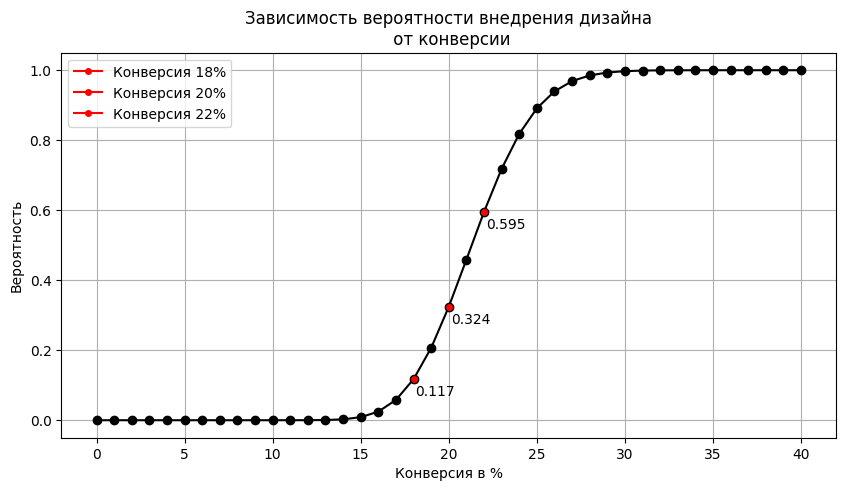

In [26]:
n=200
prob_A = []

for i in range(0,41):
  prob_A.append(1-sps.binom.cdf(n*0.21, n, i/100))

df_A = pd.DataFrame({'Probability': prob_A,
'Conversio': [i for i in range(0, 41)]})


plt.figure(figsize=(10, 5))
plt.plot(df_A['Conversio'], df_A['Probability'], marker = 'o', color = 'black')

highlight = [18, 20, 22]

for i in highlight:
    plt.plot(df_A['Conversio'][i], df_A['Probability'][i], marker='o', markersize=4, color='red', label=('Конверсия ' + str(i) + '%'))

for i in highlight:
    plt.annotate(f'{round(df_A["Probability"][i], 3)}',
                 (df_A['Conversio'][i], df_A['Probability'][i]),
                 textcoords="offset points",
                 xytext=(30,-12),
                 ha='right',
                 color='black')



plt.title('Зависимость вероятности внедрения дизайна\n от конверсии')
plt.xlabel('Конверсия в %')
plt.ylabel('Вероятность')
plt.legend()
plt.grid()
plt.show()

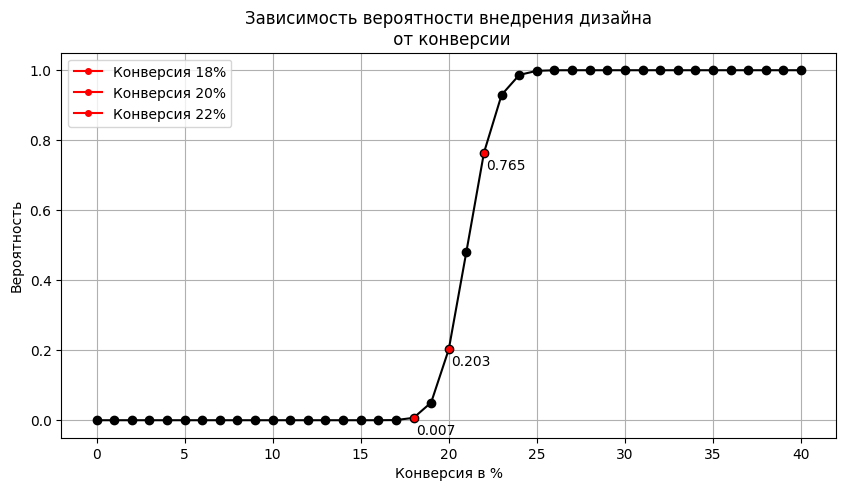

In [27]:
n=1000
prob_B = []

for i in range(0,41):
  prob_B.append(1-sps.binom.cdf(n*0.21, n, i/100))

df_B = pd.DataFrame({'Probability': prob_B,
'Conversio': [i for i in range(0, 41)]})


plt.figure(figsize=(10, 5))
plt.plot(df_B['Conversio'], df_B['Probability'],marker = 'o', color = 'black')

highlight = [18, 20, 22]

for i in highlight:
    plt.plot(df_B['Conversio'][i], df_B['Probability'][i], marker='o', markersize=4, color='red', label=('Конверсия ' + str(i) + '%'))

for i in highlight:
    plt.annotate(f'{round(df_B["Probability"][i], 3)}',
                 (df_B['Conversio'][i], df_B['Probability'][i]),
                 textcoords="offset points",
                 xytext=(30,-12),
                 ha='right',
                 color='black')



plt.title('Зависимость вероятности внедрения дизайна\n от конверсии')
plt.xlabel('Конверсия в %')
plt.ylabel('Вероятность')
plt.legend()
plt.grid()
plt.show()

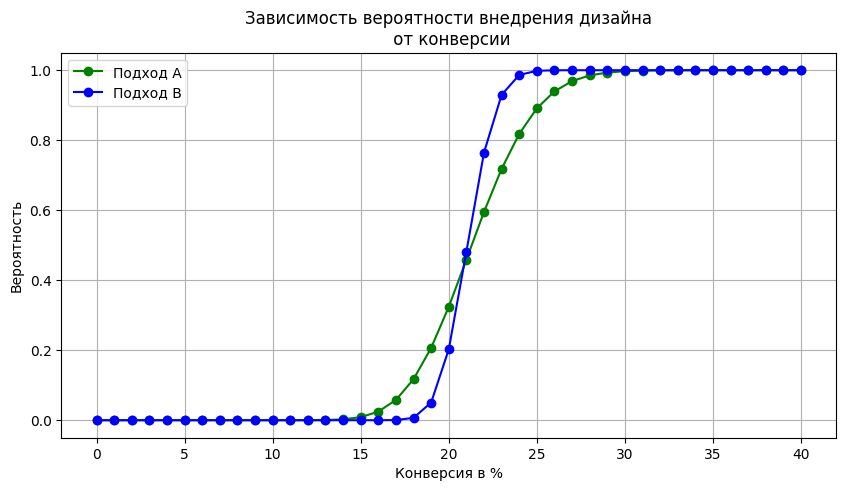

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df_A['Conversio'], df_A['Probability'], marker = 'o',color = 'green')
plt.plot(df_B['Conversio'], df_B['Probability'],marker = 'o', color = 'blue')
plt.legend(['Подход А', 'Подход В'],loc='best')
plt.title('Зависимость вероятности внедрения дизайна\n от конверсии')
plt.xlabel('Конверсия в %')
plt.ylabel('Вероятность')
plt.grid()
plt.show()

##Красный уровень

In [32]:
n = 1000
p = 0.19
print(sps.binom(n, p).cdf(p*n))

0.5193890536154848


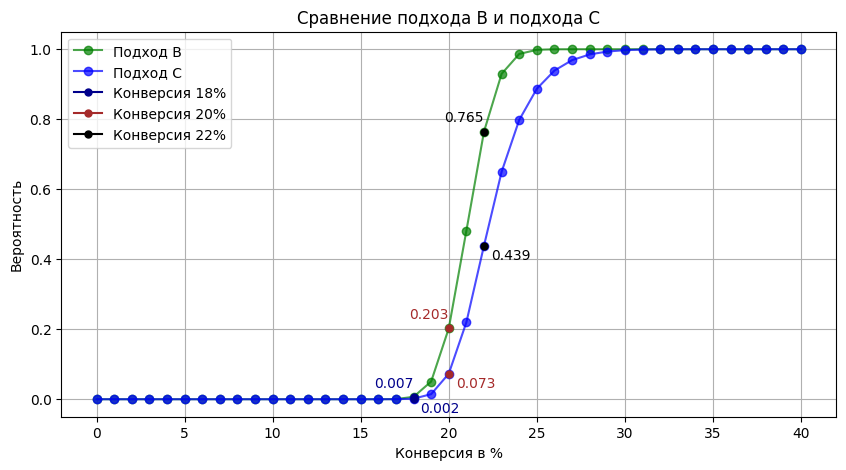

In [28]:
prob_C = []
colors = ['darkblue', 'brown', 'black']


for i in range(0,41):
  prob_C.append((1 - sps.binom.cdf(200*0.21, 200, i/100)) * (1 - sps.binom.cdf(800*0.21, 800, i/100)))

df_C = pd.DataFrame({'Probability': prob_C,
'Conversio': [i for i in range(0, 41)]})

plt.figure(figsize=(10, 5))

plt.plot(df_B['Conversio'], df_B['Probability'],marker = 'o',alpha = 0.7, color = 'green', label = 'Подход В')
plt.plot(df_C['Conversio'], df_C['Probability'],marker = 'o',alpha = 0.7, color = 'blue', label = 'Подход С')


for i in range(3):
    plt.plot(df_C['Conversio'][highlight[i]], df_C['Probability'][highlight[i]], marker='o', markersize=5, color=colors[i], label=('Конверсия ' + str(highlight[i]) + '%'))
    plt.plot(df_B['Conversio'][highlight[i]], df_B['Probability'][highlight[i]], marker='o', markersize=5, color=colors[i])

for i in range(3):
    high = highlight[i]
    color = colors[i]
    plt.annotate(f'{round(df_B["Probability"][high], 3)}',
                 (df_B['Conversio'][high], df_B['Probability'][high]),
                 textcoords="offset points",
                 xytext=(0,7),
                 ha='right',
                 color=color)

    plt.annotate(f'{round(df_C["Probability"][high], 3)}',
                 (df_C['Conversio'][high], df_C['Probability'][high]),
                 textcoords="offset points",
                 xytext=(5,-10),
                 ha='left',
                 color=color)


plt.title('Сравнение подхода B и подхода C')
plt.xlabel('Конверсия в %')
plt.ylabel('Вероятность')
plt.legend()
plt.grid()
plt.show()

##Черный уровень

In [6]:
prob_D = []
n = 500 #количество эксперементов монте-карло


for p in range(0, 41):
  monte_carlo = []
  for j in range(n):
    flag = 1
    sample = sps.bernoulli.rvs(p=p/100,size=200)

    if sum(sample) > 200*0.196:
      sample = list(sample)
      s = sps.bernoulli.rvs(p=p/100,size=800)

      for i in s:
        sample.append(i)
        if sum(sample) < len(sample)*0.196:
          flag = 0
          break

    else:
      flag = 0

    monte_carlo.append(flag)
  prob_D.append(sum(monte_carlo) / len(monte_carlo))
print(prob_D)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.004, 0.018, 0.066, 0.234, 0.438, 0.62, 0.766, 0.874, 0.946, 0.97, 0.986, 0.994, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


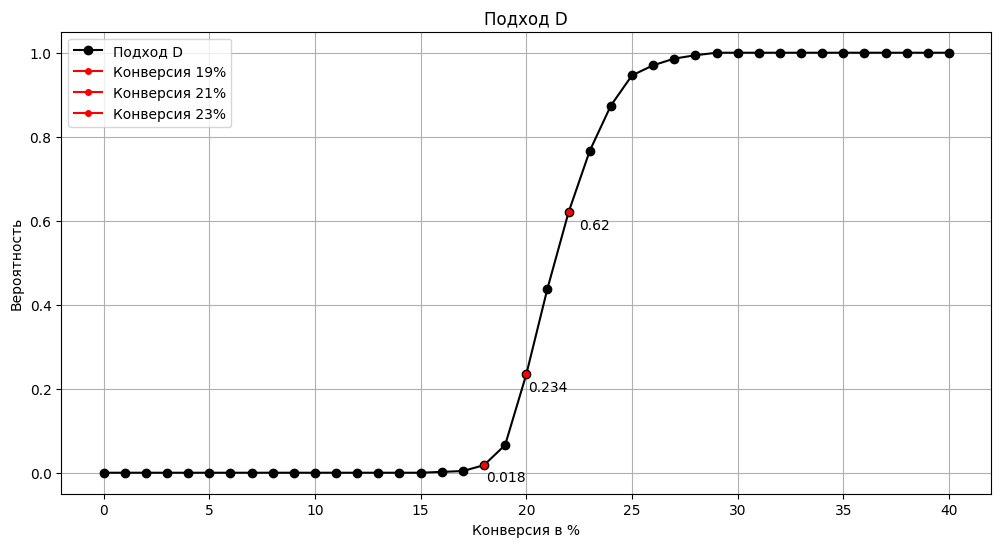

In [35]:
df_D = pd.DataFrame({'Probability': prob_D,
'Conversio': [i for i in range(0, 41)]})


plt.figure(figsize = ([12,6]))
plt.plot(df_D['Conversio'], df_D['Probability'],marker = 'o', label='Подход D', color='black')

highlight = [18, 20, 22]

for i in highlight:
    plt.plot(df_D['Conversio'][i], df_D['Probability'][i], marker='o', markersize=4, color='red', label=('Конверсия ' + str(i+1) + '%'))

for i in highlight:
    plt.annotate(f'{round(df_D["Probability"][i], 3)}',
                 (df_D['Conversio'][i], df_D['Probability'][i]),
                 textcoords="offset points",
                 xytext=(30,-12),
                 ha='right',
                 color='black')




plt.title('Подход D')
plt.xlabel('Конверсия в %')
plt.ylabel('Вероятность')
plt.legend()
plt.grid()
plt.show()


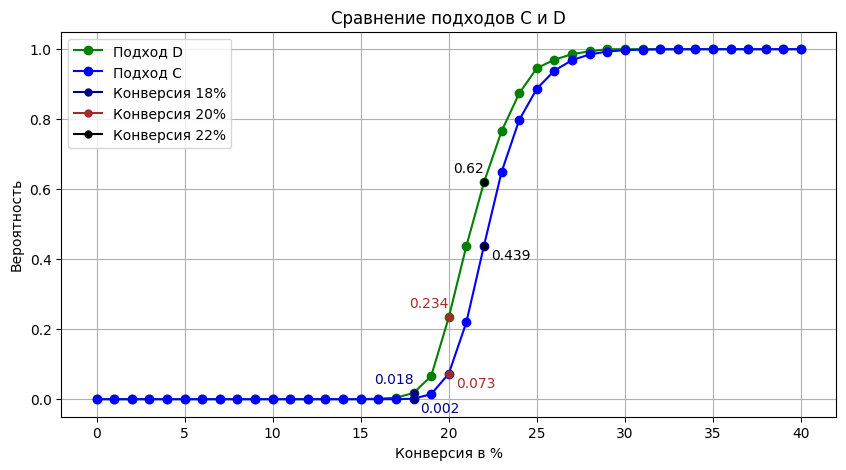

In [18]:
colors = ['darkblue', 'brown', 'black']
highlight = [18,20,22]


plt.figure(figsize=(10, 5))

plt.plot(df_D['Conversio'], df_D['Probability'],marker = 'o', color = 'green', label = 'Подход D')
plt.plot(df_C['Conversio'], df_C['Probability'],marker = 'o', color = 'blue', label = 'Подход С')


for i in range(3):
    plt.plot(df_C['Conversio'][highlight[i]], df_C['Probability'][highlight[i]], marker='o', markersize=5, color=colors[i], label=('Конверсия ' + str(highlight[i]) + '%'))
    plt.plot(df_D['Conversio'][highlight[i]], df_D['Probability'][highlight[i]], marker='o', markersize=5, color=colors[i])

for i in range(3):
    high = highlight[i]
    color = colors[i]
    plt.annotate(f'{round(df_D["Probability"][high], 3)}',
                 (df_D['Conversio'][high], df_D['Probability'][high]),
                 textcoords="offset points",
                 xytext=(0,7),
                 ha='right',
                 color=color)

    plt.annotate(f'{round(df_C["Probability"][high], 3)}',
                 (df_C['Conversio'][high], df_C['Probability'][high]),
                 textcoords="offset points",
                 xytext=(5,-10),
                 ha='left',
                 color=color)


plt.title('Сравнение подходов C и D')
plt.xlabel('Конверсия в %')
plt.ylabel('Вероятность')
plt.legend()
plt.grid()
plt.show()

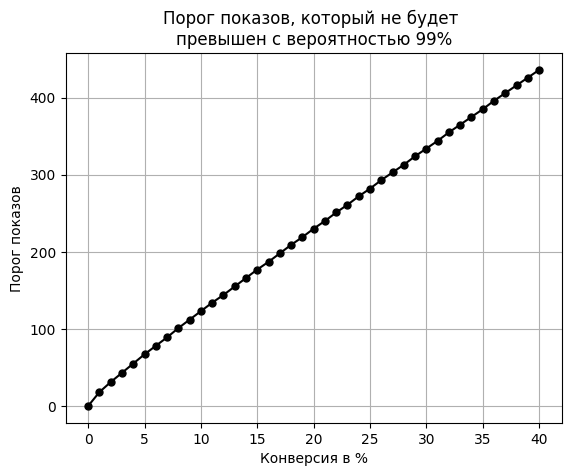

In [42]:
ppf = []
for p in range(0, 41):
  prob =  sps.binom.ppf(0.99,n=1000,p=p/100)
  ppf.append(prob)

df = pd.DataFrame({'Порог': ppf,
'Конверсия': [int(i) for i in range(0, 41)]})

plt.plot(df['Конверсия'], df['Порог'], marker='o',markersize = 5, color = 'black')

plt.title('Порог показов, который не будет \nпревышен с вероятностью 99%')
plt.xlabel('Конверсия в %')
plt.ylabel('Порог показов')
plt.grid()

plt.show()